### Blind Estimation of Speech Transmission Index in Noisy and Reverberant Environments Using Deep Learning with the Modulation Spectrum

Author : Suradej Duangpummet 

Data : June 6, 2018

In [1]:
#Import Libaries
import os
import numpy as np 
from random import shuffle
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
# --- Signal Processing Libary
import librosa
import librosa.display
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz, hilbert, filtfilt

# --- Machine Learining
import keras
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.models import load_model
from keras.models import model_from_json
from sklearn.model_selection import train_test_split,cross_val_score

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.layers import Dense, Input, Flatten, MaxPooling2D
from keras.models import Model
from keras.layers import Conv2D,Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


### Load convoluted speech signals (wav format)

In [8]:
wav_path = "data/"
files = os.listdir(wav_path)
#Allocating memory for dataset
WAV = np.zeros([(len(files),48000]) #Sampling rate 16kS/s, 3 seconds long.
STI = np.zeros([(len(files),1])

#Dataset 
j = 0
for w in files:  
                
    signal, Fs = librosa.load(wav_path+w)
    X = np.array(signal)
    Xpad = np.pad(X, (0, 48000-len(X)), mode='constant')#Padding 
    WAV[j]=np.array(Xpad)
    #Load Speech Trassmision Index (STI) as our Targets  
    sti = int(wav[0:4])
    sti /=10000
    STI[j] = rt
    j += 1
                
#save to numpy files
np.save('WAVclean',WAV)
np.save('STIclean',STI)

(36501,)

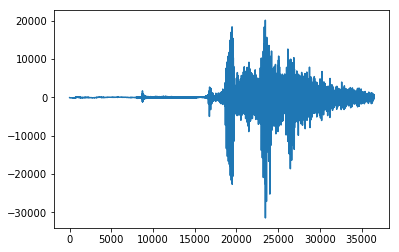

In [9]:
plt.plot(WAV[1])

### Shuffle and Split the data set

In [ ]:
#generate runing number
index = np.linspace(0,len(files)-1,len(files))

shuffle(index) 

trainingSet = 30000 #e.g. spilt first 5000 files for training
testSet = len(files)- noTrain  #the rest for testing


x_train = np.zeros([trainingSet,33,24])
y_train = np.zeros([trainingSet,1])
x_test = np.zeros([testSet,33,24])
y_test = np.zeros([testSet,1])


j=0
for i in range(0,noTrain):
    x_train[j]= x_data[int(index[i])]
    y_train[j]= Y_data[int(index[i])] 
    j +=1

j=0    
for i in range(noTrain,len(files)):
    x_test[j]= x_data[int(index[i])]
    y_test[j]= Y_data[int(index[i])]
    j +=1
    
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

### Subband Decomposition using Octave Filter bank  (seven bandpass filter)

In [ ]:
fcentre = 125 #Centre Frequency at 125 Hz
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)
y_f125 = sp.signal.filtfilt(b,a,wav[i])

In [ ]:
fcentre = 250
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)
y_f250 = sp.signal.filtfilt(b,a,wav[i])

In [ ]:
fcentre = 500
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)
y_f500 = sp.signal.filtfilt(b,a,wav[i])

In [ ]:
fcentre = 1000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)
y_f1000 = sp.signal.filtfilt(b,a,wav[i])

In [ ]:
fcentre = 2000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)
y_f2000 = sp.signal.filtfilt(b,a,wav[i])

In [ ]:
fcentre = 4000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)
y_f2000 = sp.signal.filtfilt(b,a,wav[i])

In [ ]:
fcentre = 8000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
b, a = butter_bandpass(lowcut, highcut, Fs, order=6)
y_f8000 = sp.signal.filtfilt(b,a,wav[i])

Hpyerparameter

In [2]:
batch_size = 64
epochs = 10
np.random.seed(7) #for reproducible

Lowpass Filter

In [10]:
fc = 20 # cutoff frequency of the speech envelope  at 30 Hz
N = 2   #filter order
w_L = 2*fc/Fs
#lowpas filter tf
b, a = butter(N,w_L, 'low')

Envelope Extraction using Hilbert Transform 

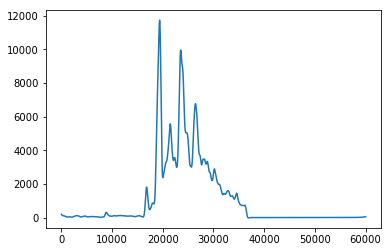

In [26]:
e_y = filtfilt(b,a,np.abs(hilbert(wav)))
plt.plot(e_y)

Down-Sampling from 16000 to 100 Hz

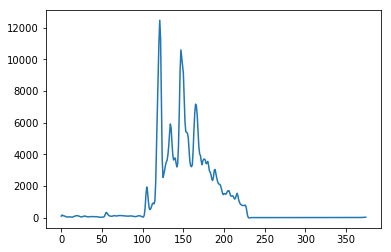

In [28]:
e_y_100Ss= librosa.resample(e_y,16000,100)
plt.plot(e_y_100Ss)   

Normailziing the signal

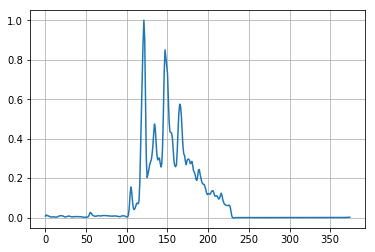

In [29]:
e_y_100Ss_n=librosa.util.normalize(e_y_100Ss)
plt.plot(e_y_100Ss_n)
plt.grid(True)

### Calulate Modulation Spectrogram using STFT

In [93]:
D.shape

(257, 286)

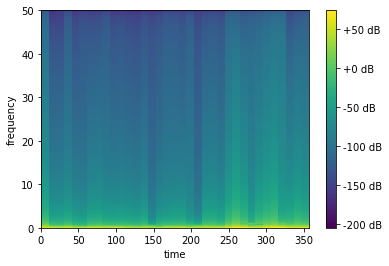

In [52]:
plt.specgram(e_y, Fs=100, NFFT=1024, noverlap=5, detrend='mean', mode='psd')
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar(format='%+2.0f dB')
plt.show()

## Build the Network

In [2]:
def MS_CNN_model():
# create model
    input_MS = Input(shape=(33,24,1))
    x = Conv2D(128, kernel_size=(3,3), strides= (2,2),padding='same', activation = 'relu')(input_MS)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Conv2D(64, kernel_size=(3,3), strides=(2,2),padding='same',activation = 'relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)

    out = Dense(1, activation='linear')(x)
    MS_CNN_model = Model(input_MS,out)

    MS_CNN_model.summary()

    MS_CNN_model.compile(loss='mse',optimizer='rmsprop',metrics=['mean_squared_error'])
    return MS_CNN_model


### --------------------------- Training ---------------------------

In [ ]:
MS_CNN_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1)

### --------------------------- Evaluating ---------------------------

In [ ]:
score = MS_CNN_model.evaluate(x_test, y_test, verbose=0)
yPredict = MS_CNN_model.predict(x_test)

print("RMSE:%.3f"%np.sqrt(metrics.mean_squared_error(y_test,yPredict)))

###  --------------------------- Save the model ---------------------------

In [ ]:
print("saving the model...")
model_json = MS_CNN_model.to_json()
with open("180606_modelMS-CNN.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("180606_modelMS-CNN.h5")

### --------------------------- load trained model --------------------------

In [ ]:
json_file = open('180606_modelMS-CNN.json','rt')
arch = json_file.read()
json_file.close()
model = model_from_json(arch)
model.load_weights('180606_modelMS-CNN.h5')
print("The model has been loaded.")